In [5]:
import numpy as np
import pandas as pd
from statistics import mean
from numpy.linalg import eig
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
x1=np.array([[2.5],[0.5],[2.2],[1.9],[3.1],[2.3],[2],[1],[1.5],[1.1]])
x2=np.array([[2.4],[0.7],[2.9],[2.2],[3],[2.7],[1.6],[1.1],[1.6],[0.9]])

x1_mean=np.mean(x1)
x2_mean=np.mean(x2)
x_mean=np.array([[x1_mean,x2_mean]])
print(x_mean)
X1=x1-x1_mean
X2=x2-x2_mean

x=np.concatenate((X1,X2),axis=1)
print("\nMatrix X : \n",x)
c1=np.dot(np.transpose(x),x)
c=c1/(len(x1)-1)
print("\nCovariance Matrix : \n",c)

e_val,e_vec=np.linalg.eig(c)

print("\nEigen values : \n",e_val,"\nEigen vectors : \n",e_vec)

nd=np.dot(x,e_vec)

print("New Data Set : \n",nd)

[[1.81 1.91]]

Matrix X : 
 [[ 0.69  0.49]
 [-1.31 -1.21]
 [ 0.39  0.99]
 [ 0.09  0.29]
 [ 1.29  1.09]
 [ 0.49  0.79]
 [ 0.19 -0.31]
 [-0.81 -0.81]
 [-0.31 -0.31]
 [-0.71 -1.01]]

Covariance Matrix : 
 [[0.617 0.615]
 [0.615 0.717]]

Eigen values : 
 [0.049 1.284] 
Eigen vectors : 
 [[-0.735 -0.678]
 [ 0.678 -0.735]]
New Data Set : 
 [[-0.175 -0.828]
 [ 0.143  1.778]
 [ 0.384 -0.992]
 [ 0.13  -0.274]
 [-0.209 -1.676]
 [ 0.175 -0.913]
 [-0.35   0.099]
 [ 0.046  1.145]
 [ 0.018  0.438]
 [-0.163  1.224]]


In [2]:
#PCA for a given Data Matrix
np.set_printoptions(suppress=True, precision = 3)

x1 = [2.5,0.5,2.2,1.9,3.1,2.3,2,1,1.5,1.1]
x2 = [2.4,0.7,2.9,2.2,3,2.7,1.6,1.1,1.6,0.9]

m1 = mean(x1)
m2 = mean(x2)
m2 = round(m2,2)

for i in range(len(x1)):
  x1[i] = x1[i] - m1
for i in range(len(x2)):
  x2[i] = x2[i] - m2

x1 = np.array(x1)
x2 = np.array(x2)
x = [x1,x2]

a = np.matmul(x,np.transpose(x))
N = len(np.transpose(x))
a = a/(N-1)
#print(a)

eigval,eigvec = eig(a)
print('The Eigen Values are:\n',eigval)
print('The Eigen Vectors are:\n',eigvec)

y = np.matmul(np.transpose(x),eigvec)
print('The components PC1 & PC2 are:\n',y)

The Eigen Values are:
 [0.049 1.284]
The Eigen Vectors are:
 [[-0.735 -0.678]
 [ 0.678 -0.735]]
The components PC1 & PC2 are:
 [[-0.175 -0.828]
 [ 0.143  1.778]
 [ 0.384 -0.992]
 [ 0.13  -0.274]
 [-0.209 -1.676]
 [ 0.175 -0.913]
 [-0.35   0.099]
 [ 0.046  1.145]
 [ 0.018  0.438]
 [-0.163  1.224]]


Covariance:  [[150.    -63.077 -53.482]
 [-63.077 150.    144.414]
 [-53.482 144.414 150.   ]]
Eigen value:  [331.807 112.987   5.207]
Eigen Vector :  [[ 0.413 -0.909 -0.056]
 [-0.65  -0.251 -0.717]
 [-0.638 -0.333  0.695]]
Principal Components are

          PC1       PC2       PC3
0    2.135655 -0.164249 -0.007789
1    1.657644  0.887424  0.056820
2    1.885811  0.481049  0.071759
3    1.716285  0.662795  0.003116
4    2.231257 -0.374583 -0.020711
..        ...       ...       ...
145 -1.507925 -0.574025  0.425009
146 -1.576580  0.681142  0.205866
147 -1.256351 -0.442846  0.151021
148 -1.199440 -1.443952  0.291757
149 -1.051673 -0.341099  0.009145

[150 rows x 3 columns]


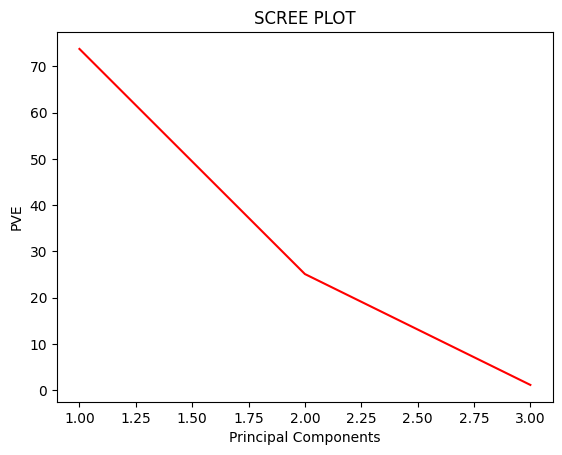

In [6]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
d = pd.read_csv(url, names=['sepal length', 'sepal width', 'petal length', 'petal width', 'target'])
d0= StandardScaler().fit_transform(d.iloc[:,1:4])
d_trans= np.transpose(d0)
cova =np.dot (d_trans, d0)
print("Covariance: ", cova)
eigen_val, eigen_vector= np.linalg.eig(cova)
print("Eigen value: ", eigen_val)
print("Eigen Vector : ", eigen_vector)
y= np.dot (d0, eigen_vector)
num_pc = min(4, len (eigen_val))
pve=[0]*num_pc
print("Principal Components are\n")
for i in range(num_pc): # Corrected the range
 pve[i] = (eigen_val[i] / sum(eigen_val)) * 100
df = pd.DataFrame(y, columns=['PC1', 'PC2', 'PC3', 'PC4'][:num_pc])
print(df.iloc[:, :num_pc]) # Corrected the column selection
x_axis_values = range (1, num_pc + 1) # Numbers as x-axis values
plt.xlabel('Principal Components')
plt.ylabel('PVE')
plt.title('SCREE PLOT')
plt.plot(x_axis_values, pve, "r") # Corrected the x-axis values
plt.show()